see `mpf_rsi_demo.py`

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd

import numpy as np

import mplfinance as mpf

In [3]:
def relative_strength(prices, n=14):
    """
    compute the n period relative strength indicator
    http://stockcharts.com/school/doku.php?id=chart_school:glossary_r#relativestrengthindex
    http://www.investopedia.com/terms/r/rsi.asp
    """
    deltas = np.diff(prices)
    seed = deltas[:n + 1]
    up = seed[seed >= 0].sum() / n
    down = -seed[seed < 0].sum() / n
    rs = up / down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100. / (1. + rs)

    for i in range(n, len(prices)):
        delta = deltas[i - 1]  # cause the diff is 1 shorter

        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up * (n - 1) + upval) / n
        down = (down * (n - 1) + downval) / n

        rs = up / down
        rsi[i] = 100. - 100. / (1. + rs)

    return rsi

def _ta_RSI(df, n=14):
    # https://github.com/wgong/mplfinance/blob/master/examples/rsi.py
    diff = df.Close.diff().values
    diff = df.w_p.diff().values
    gains = diff
    losses = -diff
    with np.errstate(invalid='ignore'):
        gains[(gains<0)|np.isnan(gains)] = 0.0
        losses[(losses<=0)|np.isnan(losses)] = 1e-10 # we don't want divide by zero/NaN
    m = (n-1) / n
    ni = 1 / n
    g = gains[n] = np.nanmean(gains[:n])
    l = losses[n] = np.nanmean(losses[:n])
    gains[:n] = losses[:n] = np.nan
    for i,v in enumerate(gains[n:],n):
        g = gains[i] = ni*v + m*g
    for i,v in enumerate(losses[n:],n):
        l = losses[i] = ni*v + m*l
    rs = gains / losses
#     df['rsi'] = 100 - (100/(1+rs))
    return 100 - (100/(1+rs))

In [4]:
infile = 'data/yahoofinance-SPY-20200901-20210113.csv'

# df = pd.read_csv(infile, index_col=0, parse_dates=True).iloc[0:60]
df = pd.read_csv(infile, index_col=0, parse_dates=True)

In [5]:
df.shape

(92, 6)

In [6]:
RSI_PERIOD = 20

In [7]:
df["w_p"] = 0.25*(2*df['Close'] + df['High'] + df['Low'])

In [8]:
df['rsi'] = relative_strength(df['w_p'],n=RSI_PERIOD)

df['rsi_2'] = _ta_RSI(df,n=RSI_PERIOD)

In [9]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,w_p,rsi,rsi_2
Date,,,,,,,,,
2020-12-29,373.809998,374.000000,370.829987,371.459991,371.459991,53680500,371.937492,62.630860,62.273849
2020-12-30,372.339996,373.100006,371.570007,371.989990,371.989990,49455300,372.162498,62.854536,62.500259
2020-12-31,371.779999,374.660004,371.230011,373.880005,373.880005,78469000,373.412506,64.110755,63.771703
2021-01-04,375.309998,375.450012,364.820007,368.790009,368.790009,110210800,369.462509,57.628082,57.308493
2021-01-05,368.100006,372.500000,368.049988,371.329987,371.329987,66426200,370.802491,59.104722,58.799571
2021-01-06,369.709991,376.980011,369.119995,373.549988,373.549988,107997700,373.299996,61.721888,61.441739
2021-01-07,376.100006,379.899994,375.910004,379.100006,379.100006,68766800,378.502503,66.432332,66.195293
2021-01-08,380.589996,381.489990,377.100006,381.260010,381.260010,71677200,380.277504,67.853068,67.628555
2021-01-11,377.850006,380.579987,377.720001,378.690002,378.690002,51176700,378.919998,65.617284,65.396413


## Compare two RSI functions

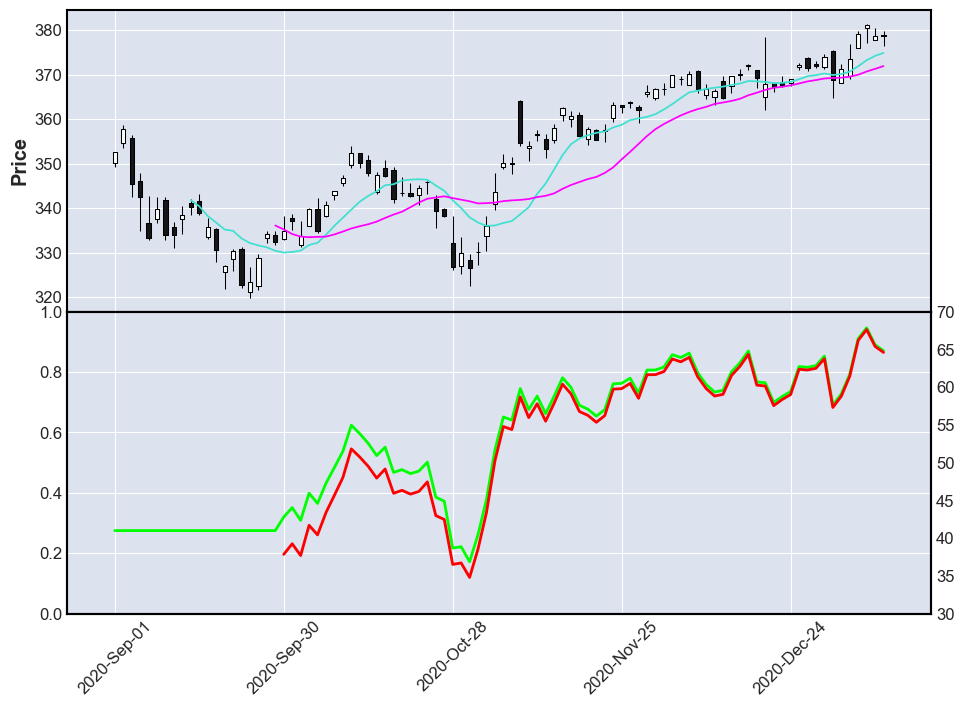

In [10]:
apd = mpf.make_addplot(df['rsi'],panel=1,color='lime',ylim=(30,70),secondary_y=True)
apd_2 = mpf.make_addplot(df['rsi_2'],panel=1,color='red',ylim=(30,70),secondary_y=True)
mpf.plot(df,type='candle',volume=False,mav=(10,20),figscale=1.5,addplot=[apd,apd_2],panel_ratios=(1,1))

## profile two functions

In [13]:
%%timeit
df['rsi'] = relative_strength(df['w_p'],n=RSI_PERIOD)  
# 548 µs ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

548 µs ± 28.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit
df['rsi_2'] = _ta_RSI(df,n=RSI_PERIOD)
# 1.05 ms ± 44.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

1.05 ms ± 44.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [1]:
tmp = {}

In [2]:
list(tmp.keys())

[]